In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

In [2]:
a_file = open('wt/r2/data.txt', 'r')
lines = a_file.readlines()
a_file.close()
del lines[0]


#create a copy of data.txt file to prevent directly editing the original file.
new_file = open("wt/r2/data1.txt", "w")
for line in lines:

        new_file.write(line)

new_file.close()

In [3]:
row1 = []
row2 = []
row3 = []
row4 = []
row5 = []

with open("wt/r2/data1.txt", "r") as f:
    for row in f:
        row = row.split()
        row1.append(float(row[0]))
        row2.append(float(row[1]))
        row3.append(float(row[2]))
        row4.append(float(row[3]))
        row5.append(float(row[4]))


In [4]:
data1 = np.array([row1,row2,row3,row4,row5]).T
df = pd.DataFrame(data1,columns=['A', 'B', 'C', 'D','E'])
df = df.sort_values(by=['A','B','C'])

In [5]:
df1 = df.reset_index(drop=True)

In [6]:
%%time
start=0        # starting residues number, we start from 0. You may chose your starting point 
end=466        # ending residues number.
i = 0
n = 0
nn =0
ii = 0
ac=0
nresidue=end-start
frames=500     # number of frame of your trajectories
x = np.zeros((nresidue,nresidue,frames))

while i < frames:
    cf = (df1['A'] == i) # condition frames
    df2 = df1[cf]
    while n < nresidue:
        ac=n+start
        cr = (df2['B'] == ac) # condition residues
        df3 = df2[cr]
        df4 = df3.reset_index(drop=True)
        while nn < len(df4):
            if df4['C'][nn]-start < nresidue:
                y = int(df4['C'][nn]-start)
                x[y-1,n,i] = df4['D'][nn]
            nn = nn+1
        nn = 0
        n = n+1           
    n = 0
    i = i+1



CPU times: user 43.5 s, sys: 46.9 ms, total: 43.5 s
Wall time: 1min 8s


In [7]:
i = 0
X = np.zeros((1,nresidue))
A = np.zeros((nresidue,nresidue,frames))
b = list(range(0,frames))
while i <frames:
    a = pd.DataFrame(x[:,:,i])
    a = np.vstack([X,a])
    A[:,:,i] = a[0:nresidue,0:nresidue]
    b[i] = pd.DataFrame(A[:,:,i])
    b[i].index = np.arange(1, nresidue+1)
    b[i].columns = np.arange(1, nresidue+1)
    i = i+1

In [8]:
#b[0]

In [9]:
#find average
i = 51
z_all = b[50]
while i < frames:
    z_all = b[i]+z_all
    i = i+1
z_avg = z_all/450


In [10]:
del df
del df1
del df2
del df3
del df4

In [26]:
#z_avg.loc[:,:]

In [12]:
#z_avg.to_csv('test.csv', index=False,header=None)    #save the csv file for further analysis

In [14]:
z_avg1 = z_avg.loc[310:466,1:309]    # residues number of plotting contact map
fig = plt.figure(figsize = (200,100))
ax = sns.heatmap(z_avg1,cmap="RdBu_r",mask=((z_avg1>-10) & (z_avg1<10)),annot = True,fmt='.1f',annot_kws={"size": 10},vmin=-20, vmax=20)

### Force of specic interaction vs frames

In [17]:
# force for specic interaction over frames
i = 50
Ef = np.zeros((1,frames))
while i<frames:
    Ef[0,i] = b[i].loc[464,160]   # pairwise residues 
    i = i+1
Er = pd.DataFrame(Ef[0])
#np.savetxt(r'test.txt',Er.values)

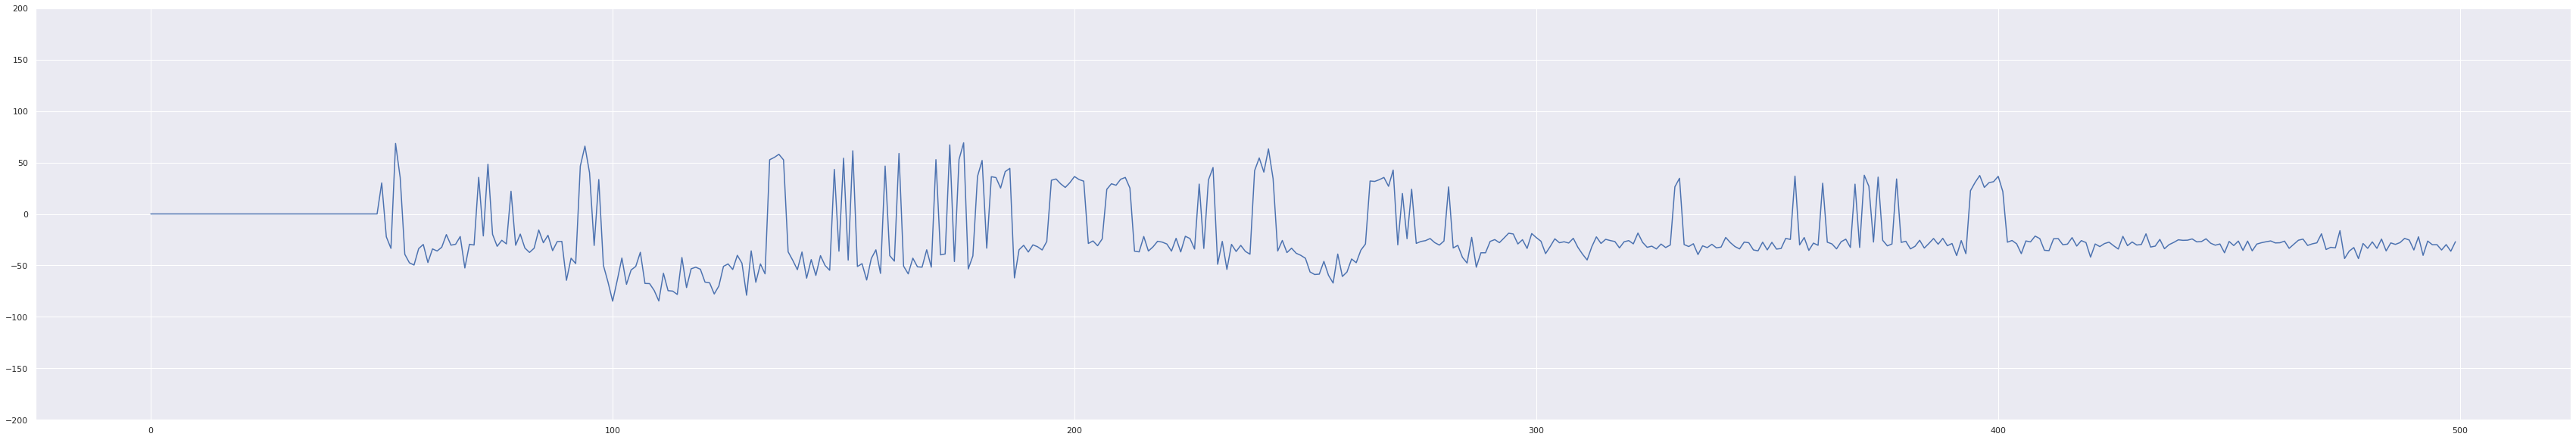

In [19]:
fig = plt.figure(figsize = (60,10))
plt.plot(Ef[0])
plt.ylim((-200,200))
plt.show()

### Force of specifc region over Frames

In [23]:
i = 0
Esum = np.zeros((1,frames))
while i<frames:
    dff = pd.DataFrame(b[i].loc[460:466,151:165])   # residues number of the regions
    dfsum = dff.sum(axis = 1)
    dfsum1 = dfsum.sum(axis = 0)
    Esum[0,i] = dfsum1
    i = i+1
Err = pd.DataFrame(Esum[0])
#np.savetxt(r'test.txt',Err.values)

In [24]:
Err, Err.mean()

(               0
 0     819.555797
 1    1021.671128
 2     419.392685
 3     254.933909
 4    1636.542709
 ..           ...
 495  -133.991622
 496   -98.606787
 497  -204.483670
 498  -165.043711
 499  1022.443700
 
 [500 rows x 1 columns],
 0   -188.103124
 dtype: float64)

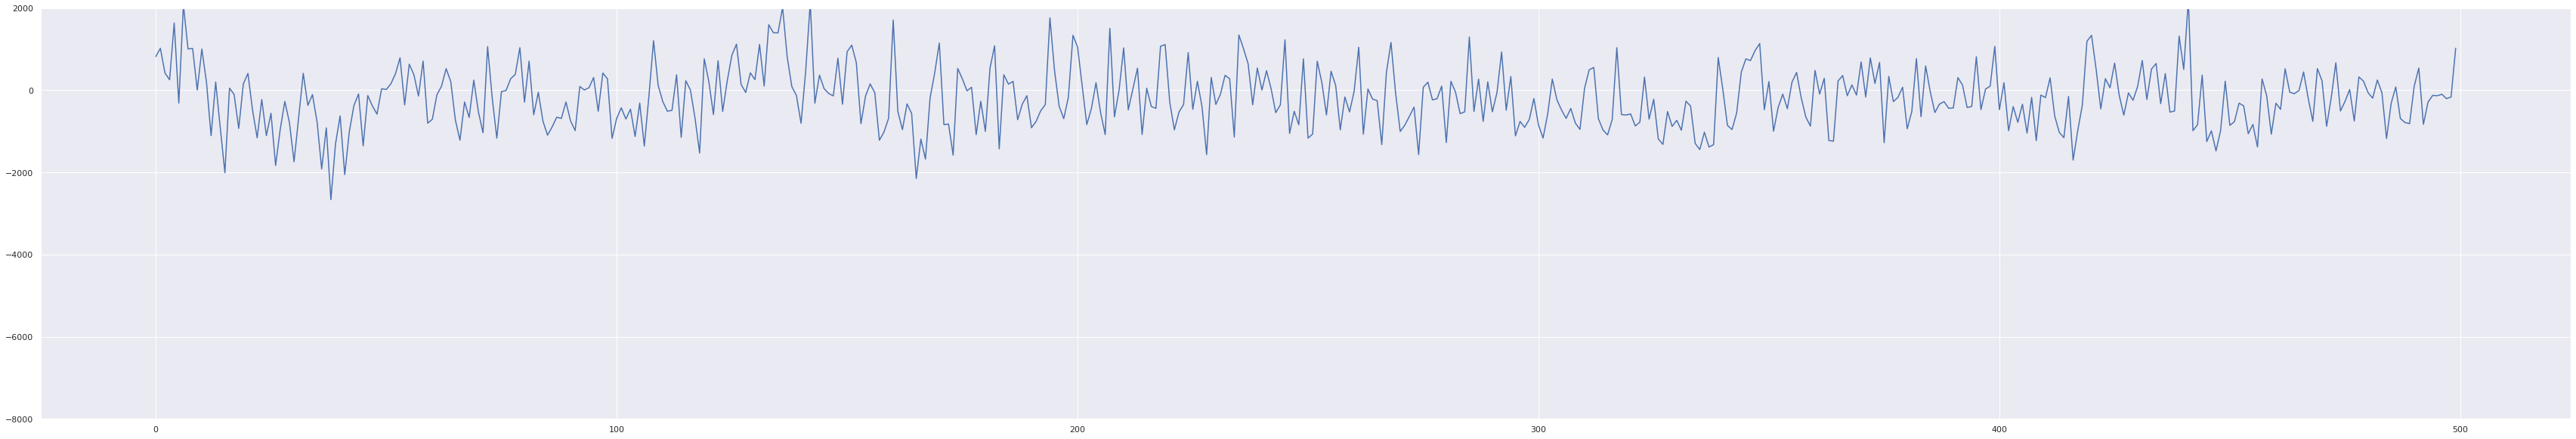

In [25]:
fig = plt.figure(figsize = (60,10))
plt.plot(Esum[0])
plt.ylim((-8000,2000))
plt.show()